# Numpy 배열을 입력으로 하는 CNN 예제

## 데이터 셋 생성
### 28*28 사이즈의 RGB 3채녈 100장 (0.5 ~ 1.0) vs ''(0 ~ 0.5) vs ''(0.0 ~ 1.0)

##### 이미지는 RGB 3채널 => 각 채널의 2차원 배열이 3장 겹쳐서 보여지는 형태

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##### 28 * 28 * 3 의 3차원 배열 생성 
    sample_data_0 => 각 원소는 0.5 ~ 1.0
    sample_data_1 => 각 원소는 0.0 ~ 0.5
    sample_data_2 => 각 원소는 0.0 ~ 1.0

In [3]:
np.random.seed(0)

sample_data_0 = np.random.uniform(0.5, 1.0, size=(100, 28, 28, 3))
sample_data_1 = np.random.uniform(0.0, 0.5, size=(100, 28, 28, 3))
sample_data_2 = np.random.uniform(0.0, 1.0, size=(100, 28, 28, 3))

##### => 시각화

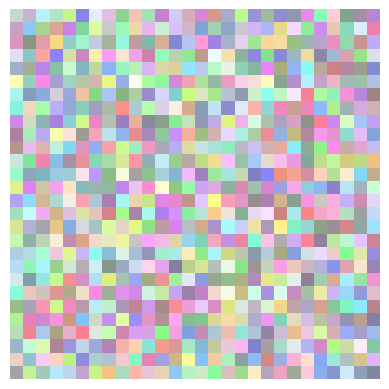

In [4]:
# sample_data_0의 첫번째 그림

plt.imshow(sample_data_0[0])
plt.axis('off')
plt.show()

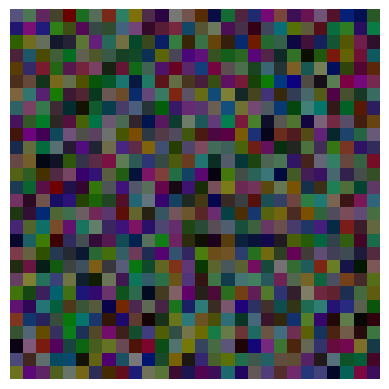

In [5]:
# sample_data_1의 첫번째 그림

plt.imshow(sample_data_1[0])
plt.axis('off')
plt.show()

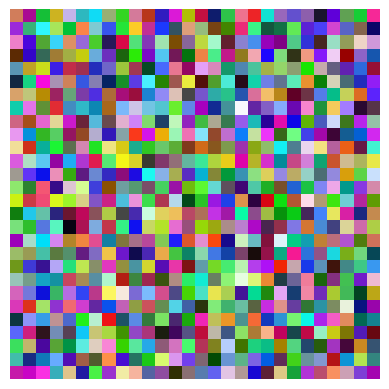

In [6]:
# sample_data_2의 첫번째 그림

plt.imshow(sample_data_2[0])
plt.axis('off')
plt.show()

##### 셋은 명확히 다름!

## 레이블 데이터 생성

In [7]:
labels_sample_data_0 = np.zeros((sample_data_0.shape[0],)) 
labels_sample_data_1 = np.ones((sample_data_1.shape[0],))
labels_sample_data_2 = np.full((sample_data_2.shape[0],), 2)

### 데이터셋 형성
##### 신경망 입력으로 사용될 데이터로 바꾸기

In [8]:
input_data = np.concatenate((sample_data_0, sample_data_1, sample_data_2), axis = 0)
# axis = 0 으로 concatenate 
input_data.shape

(300, 28, 28, 3)

In [9]:
input_labels = np.concatenate((labels_sample_data_0, labels_sample_data_1,labels_sample_data_2), axis = 0 )
# axis = 0 으로 concatenate 
input_labels.shape

(300,)

### 모델 만들기

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# 데이터는 다중 클래스(3 클래스) => 마지막 Dense 충의 뉴런은 3개!

##### 모델 summary로 확인

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

#### 모델 컴파일 
##### 옵티마이저 => adam
##### 손실 함수 => sparse_categorical_crossentropy
##### 모델 평가 지표 => 정확도를 산출

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 모델 훈련

In [13]:
model.fit(input_data, input_labels, epochs = 5, batch_size = 32)

Epoch 1/5
10/10 [==============================] - 1s 23ms/step - loss: 0.8885 - accuracy: 0.6233
Epoch 2/5
10/10 [==============================] - 0s 22ms/step - loss: 0.4053 - accuracy: 0.7167
Epoch 3/5
10/10 [==============================] - 0s 23ms/step - loss: 0.2170 - accuracy: 0.9300
Epoch 4/5
10/10 [==============================] - 0s 20ms/step - loss: 0.0769 - accuracy: 0.9967
Epoch 5/5
10/10 [==============================] - 0s 21ms/step - loss: 0.0130 - accuracy: 1.0000


### 훈련 데이터에 대해서 이제 100퍼센트 분류함!

## 새로운 데이터 넣어서 산출 값 확인하기

In [14]:
new_data = np.random.rand(1, 28, 28, 3)

##### 모델의 입력으로서 전달하기 위해선 배치 차원이 있어야함.
##### => (배치, 높이, 너비, 채널) 형태의 입력을 항상 유지
    sample_data_0 => 각 원소는 0.5 ~ 1.0 => 밝고 흐릿함
    sample_data_1 => 각 원소는 0.0 ~ 0.5 => 어둡고 흐릿함
    sample_data_2 => 각 원소는 0.0 ~ 1.0 => 전체적으로 쨍함

##### 시각화

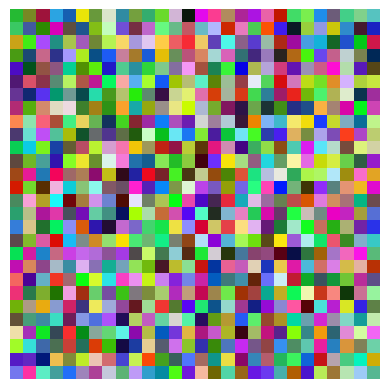

In [15]:
plt.imshow(new_data[0])
plt.axis('off')
plt.show()

### 모델에 새로운 데이터를 통과

In [16]:
prediction = model.predict(new_data)
prediction

1/1 [==============================] - 0s 124ms/step


array([[8.5611956e-04, 9.4348448e-05, 9.9904948e-01]], dtype=float32)

##### 인덱스 2의 값이 제일 높음 => 레이블 2로 분류할 것!
#### 예측 결과 출력

In [17]:
predicted_class = np.argmax(prediction)
print(f"Predicted class: {predicted_class}")

Predicted class: 2


## 새로운 데이터 2
#### 이번엔 0.3 ~ 0.8
    sample_data_0 => 각 원소는 0.5 ~ 1.0 => 밝고 흐릿함
    sample_data_1 => 각 원소는 0.0 ~ 0.5 => 어둡고 흐릿함
    sample_data_2 => 각 원소는 0.0 ~ 1.0 => 전체적으로 쨍함

In [29]:
new_data_2 = np.random.uniform(0.3, 0.8, size = (1,28,28,3))

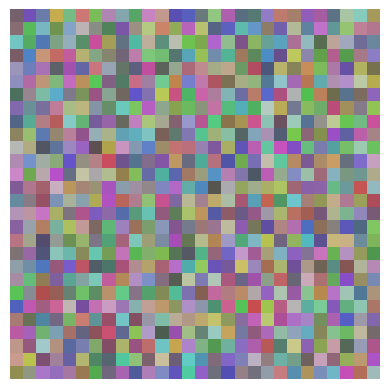

In [30]:
plt.imshow(new_data_2[0])
plt.axis('off')
plt.show()

In [31]:
prediction = model.predict(new_data_2)
prediction

1/1 [==============================] - 0s 22ms/step


array([[9.9999070e-01, 9.2457305e-14, 9.3447406e-06]], dtype=float32)

In [32]:
predicted_class = np.argmax(prediction)
print(f'predicted_class : {predicted_class}')

predicted_class : 0


##### 이건 0번으로 예측함

#### SOFTMAX 함수의 결과를 시각화하여 확인

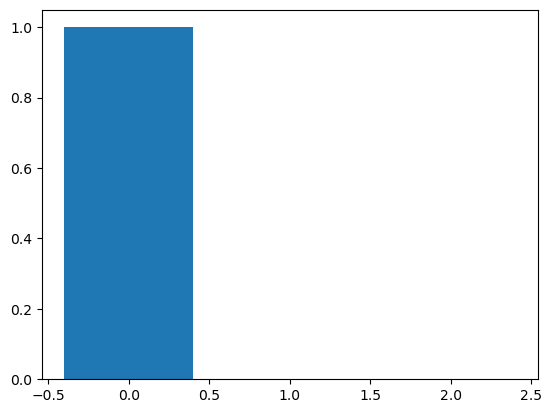

In [33]:
plt.bar(range(len(prediction[0])), prediction[0])
plt.show()

##### 확률이 너무 높게 나왔네... 
##### 0.3 ~ 0.8 이라면 그래도 레이블 1이나 2를 어느정도 포함해야한다는건데...

### 새로운 데이터 3

##### 0.4 ~ 0.6 으로 조정
    sample_data_0 => 각 원소는 0.5 ~ 1.0 => 밝고 흐릿함
    sample_data_1 => 각 원소는 0.0 ~ 0.5 => 어둡고 흐릿함
    sample_data_1 => 각 원소는 0.0 ~ 1.0 => 전체적으로 쨍함

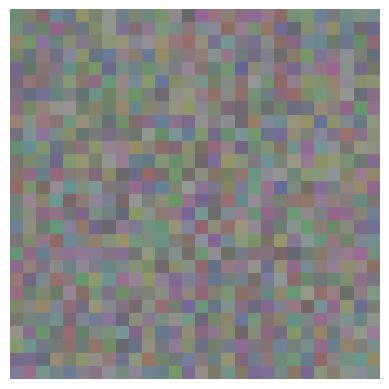

In [8]:
new_data_3 = np.random.uniform(0.4, 0.6, size = (1,28,28,3))
plt.imshow(new_data_3[0])
plt.axis('off')
plt.show()

In [9]:
prediction = model.predict(new_data_3)
predicted_class = np.argmax(prediction)
print(f'prediction : {prediction}')
print(f'predicted_class : {predicted_class}')

1/1 [==============================] - 0s 158ms/step
prediction : [[0.99983144 0.00106064 0.54316   ]]
predicted_class : 0


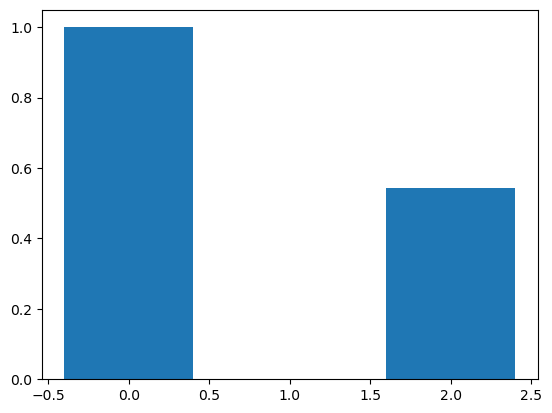

In [10]:
plt.bar(range(len(prediction[0])), prediction[0])
plt.show()

##### 0.4 ~ 0.6이면 애매한 출력을 기대했는데, 애매한 출력이 나오지 않는다. 어떻게 하면 좋을까?

# 모델 2

##### 마지막 층 softmax => sigmoid

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 데이터 생성

np.random.seed(0)
# 데이터
sample_data_0 = np.random.uniform(0.5, 1.0, size=(100, 28, 28, 3))
sample_data_1 = np.random.uniform(0.0, 0.5, size=(100, 28, 28, 3))
sample_data_2 = np.random.uniform(0.0, 1.0, size=(100, 28, 28, 3))
train_range_list = [[0.5,1.0],[0.0,0.5],[0.0,1.0]]
sample_data_list = [sample_data_0,sample_data_1,sample_data_2]
# 레이블
labels_sample_data_0 = np.zeros((sample_data_0.shape[0],)) 
labels_sample_data_1 = np.ones((sample_data_1.shape[0],))
labels_sample_data_2 = np.full((sample_data_2.shape[0],), 2)

# input 형성
input_data = np.concatenate((sample_data_0, sample_data_1, sample_data_2), axis = 0)
# input label 형성
input_labels = np.concatenate((labels_sample_data_0, labels_sample_data_1,labels_sample_data_2), axis = 0 )

In [33]:
# 모델 수정
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(input_data, input_labels, epochs = 5, batch_size = 32)
# 데이터는 다중 클래스(3 클래스) => 마지막 Dense 충의 뉴런은 3개!

Epoch 1/5
10/10 [==============================] - 1s 25ms/step - loss: 1.2030 - accuracy: 0.3333
Epoch 2/5
10/10 [==============================] - 0s 20ms/step - loss: 1.1257 - accuracy: 0.4567
Epoch 3/5
10/10 [==============================] - 0s 22ms/step - loss: 0.9160 - accuracy: 0.6667
Epoch 4/5
10/10 [==============================] - 0s 20ms/step - loss: 0.7390 - accuracy: 0.6900
Epoch 5/5
10/10 [==============================] - 0s 21ms/step - loss: 0.6687 - accuracy: 0.8867


1/1 [==============================] - 0s 121ms/step
-----prediction-----
[[0.29335064 0.15320507 0.5534443 ]
 [0.14542699 0.4717167  0.3828563 ]
 [0.6658315  0.05743375 0.2767348 ]]
class 0 : 0.5 ~ 1.0
class 1 : 0.0 ~ 0.5
class 2 : 0.0 ~ 1.0
new_input 0 range : [0.1, 0.9]////new_input 1 range : [0.0, 0.55]////new_input 2 range : [0.35, 0.75]////

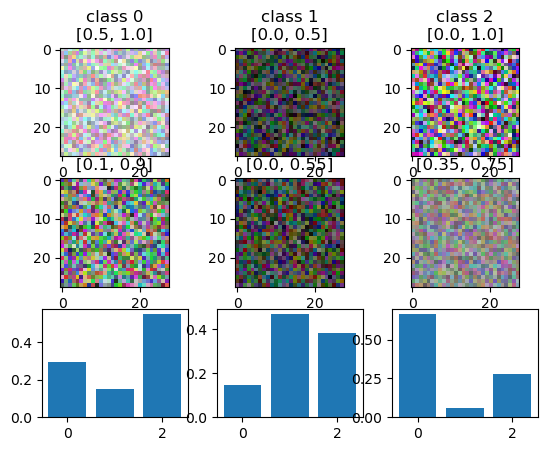

In [34]:
new_data_0 = np.random.uniform(0.3, 0.7, size = (1,28,28,3))
new_data_1 = np.random.uniform(0.0, 0.55, size = (1,28,28,3))
new_data_2 = np.random.uniform(0.4, 0.8, size = (1,28,28,3))

range_list = [[0.1,0.9],[0.0,0.55],[0.35,0.75]]
new_data_list = []
for i in range(3):
    new_data = np.random.uniform(range_list[i][0], range_list[i][1], size = (1,28,28,3))
    new_data_list.append(new_data)
new_input = np.concatenate(new_data_list, axis = 0)

prediction = model.predict(new_input)
print(f'-----prediction-----\n{prediction}')

classes = [0,1,2]
print(f'class 0 : 0.5 ~ 1.0')
print(f'class 1 : 0.0 ~ 0.5')
print(f'class 2 : 0.0 ~ 1.0')
for i in range(3):
    print(f'new_input {i} range : {range_list[i]}', end = '////')
for idx, arr in enumerate(prediction):
    plt.subplot(3,3,idx + 1)
    plt.title(f'class {idx}\n{train_range_list[idx]}')
    plt.imshow(sample_data_list[idx][0])
    plt.subplot(3,3,idx + 4)
    plt.title(f'{range_list[idx]}')
    plt.imshow(new_input[idx])
    plt.subplot(3,3,idx + 7)
    plt.bar(classes, arr)
plt.show()

##### 얼추 원하는 결과가 나옴